## Exploring Top2Vec on Recipe Topic Generation

Guide here: https://github.com/ddangelov/Top2Vec

#### Notes:
When running Top2Vec with Doc2Vec on the unmodified (only the initial quote and bracket removed from directions; both reformatted into a list of strings) directions and ingredients columns the topics returned were somewhat messy with words like recipe and ingredient sprinkled throughout.

BERT returned far fewer topics on both columns.

Using the "clean" and preprocessed columns, BERT only returned two topics for the ingredients list.

The clean and preprocessed directions column was found to contain nan for some (31 total out of 22k) recipes where the directions were short such as "Mix all the ingredients." and all words were removed during cleaning. There was one instance that numbers were the only characters present for both ingredients and directions. These were removed before running the topic generation model when the column of interest was impacted.

In [1]:
import pandas as pd
from top2vec import Top2Vec

In [2]:
df = pd.read_csv('Recipe_Recommendation/dataset/Recipe_sample_dataset_small_heroclean.csv')

In [4]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [5]:
df.head()

,title,ingredients,directions,link,source,NER,clean_ingredients,clean_directions,clean_ingredients_spice_r,clean_directions_spice_r
0,Apple Dip,"[""1 (7 oz.) jar Marshmallow Creme"", ""1 (8 oz.)...","[""Bring cream cheese to room temperature. Mix ...",www.cookbooks.com/Recipe-Details.aspx?id=980881,Gathered,"[""Marshmallow Creme"", ""cream cheese""]",jar marshmallow creme pkg cream cheese philade...,bring cream cheese room temperature mix marshm...,jar marshmallow creme cream cheese philadel...,bring cream cheese temperature mix marshmallo...
1,Wasabi Whipped Potatoes,"[""1 1/2 lb. russet or Yukon gold potatoes, pee...","[""Place potatoes in large saucepan, cover with...",www.vegetariantimes.com/recipe/wasabi-whipped-...,Recipes1M,"[""russet"", ""low-fat milk"", ""butter"", ""wasabi p...",russet yukon gold potato inch cube low fat m...,place potato large saucepan cover cold water s...,russet yukon gold potato fat milk rice ...,place potato saucepan cold rinse away star...
2,Caramel Breakfast Rolls,"[""2 (1 lb.) loaves frozen bread dough, thawed""...","[""Cut 1 loaf of bread into small pieces; place...",www.cookbooks.com/Recipe-Details.aspx?id=537560,Gathered,"[""bread"", ""brown sugar"", ""regular vanilla pudd...",loaf bread dough brown sugar pkg regular van...,loaf bread small piece place piece greased x x...,loaf frozen bread dough firmly brown sugar...,loaf bread place greased combine brow...
3,Egg And Sausage Muffins,"[""1/4 cup cream (half & half)"", ""12 large eggs...","[""Preheat oven to 350 \u00b0F (175 \u00b0C). S...",www.epicurious.com/recipes/member/views/egg-an...,Gathered,"[""cream"", ""eggs"", ""pepper"", ""salt"", ""pork saus...",cream half half large egg pepper salt pork...,preheat oven f spray muffin tin spray like pa...,cream egg pork sausage,preheat oven f muffin tin pam bundt mu...
4,Taco Soup,"[""2 lb. lean ground beef"", ""1 small onion, cho...","[""Brown ground beef and onions; drain fat."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=288957,Gathered,"[""lean ground beef"", ""onion"", ""pintos"", ""kidne...",lean ground beef small onion bean l bean t...,brown ground beef onion fat boil heat simmer ...,beef onion pinto kidney bean l lim...,brown beef onion fat remaining bring boil ...


In [33]:
df[df['clean_ingredients'].isna()]

,title,ingredients,directions,link,source,NER,clean_ingredients,clean_directions
10538,New Recipe Form Mac/Safari,"[""123456789 123456789 123456789 123456789 1234...","[""123456789 123456789 123456789 123456789 1234...",www.epicurious.com/recipes/member/views/new-re...,Gathered,[],NaN,NaN


In [6]:
documents = [x for x in df['clean_ingredients_spice_r'] if type(x)==str]

In [7]:
documents

[' jar marshmallow creme   cream cheese philadelphia',
 ' russet yukon gold potato       fat milk rice milk  butter margarine  wasabi paste   green onion ',
 ' loaf frozen bread dough   firmly  brown sugar  regular vanilla pudding pie  mix  regular butterscotch pie  mix  butter margarine   milk   nut    raisin ',
 ' cream    egg      pork sausage',
 '   beef  onion   pinto    kidney bean   l  lima bean    hominy     tomato    green chilies       taco    ranch dressing mix    tomato sauce',
 '   sugar   milk powder    milk     shortening   yeast   flour ',
 ' sweet potato stick butter        vanilla  sugar  pecan',
 ' sugar  distilled white vinegar stick     peach',
 '  red kidney bean    peanut canola oil    onion         fresh      tomato   tomato         fresh hot green chilie    hungarian yellow   fresh lemon juice',
 '  peanut skin  white almond bark  chocolate chip',
 ' fingerling potato      parsley   chive  olive oil  fresh lemon juice',
 '  cucumber   alum   alum    red vinegar

In [30]:
model = Top2Vec(documents, min_count=70, ngram_vocab=True, speed='deep-learn')
#add min_count next and try deep learn

2022-06-18 14:30:16,930 - top2vec - INFO - Pre-processing documents for training
2022-06-18 14:30:17,671 - top2vec - INFO - Creating joint document/word embedding
2022-06-18 14:34:09,172 - top2vec - INFO - Creating lower dimension embedding of documents
2022-06-18 14:34:15,851 - top2vec - INFO - Finding dense areas of documents
2022-06-18 14:34:17,422 - top2vec - INFO - Finding topics


In [31]:
model.get_num_topics()

234

In [32]:
model.get_topics()

(array([['yeast warm', 'nutritional yeast', 'rise yeast', ...,
         'jalapeno chile', 'pet milk', 'loaf bread'],
        ['refried bean', 'salsa verde', 'hungry jack', ..., 'pea pod',
         'beef brisket', 'lima bean'],
        ['skinless boneless', 'boneless skinless', 'skinless chicken',
         ..., 'frozen spinach', 'loin roast', 'lime wedge'],
        ...,
        ['smooth peanut', 'crunchy peanut', 'reese peanut', ...,
         'tuna flaked', 'loin roast', 'teddy graham'],
        ['crescent roll', 'crescent dinner', 'ranch salad', ...,
         'meatless spaghetti', 'bibb lettuce', 'dressing'],
        ['pistachio pudding', 'cool whip', 'dream whip', ...,
         'touch philadelphia', 'seedless watermelon', 'graham']],
       dtype='<U22'),
 array([[0.8225645 , 0.7903609 , 0.7846078 , ..., 0.20535165, 0.205131  ,
         0.20215988],
        [0.68503714, 0.6650538 , 0.6536443 , ..., 0.28238222, 0.27972814,
         0.27936554],
        [0.8481142 , 0.8306571 , 0.784432

In [33]:
model.get_topic_sizes()

(array([305, 302, 241, 237, 205, 200, 190, 189, 187, 181, 176, 176, 163,
        162, 158, 156, 156, 155, 151, 151, 147, 147, 146, 146, 143, 141,
        140, 139, 137, 136, 134, 129, 128, 128, 127, 125, 124, 124, 124,
        123, 123, 123, 120, 118, 118, 117, 117, 116, 115, 114, 114, 113,
        113, 113, 113, 113, 113, 111, 110, 110, 110, 109, 108, 108, 107,
        106, 106, 105, 105, 105, 105, 105, 105, 104, 103, 103, 103, 102,
        102, 102, 101, 101, 101, 101, 101, 101, 100,  99,  99,  98,  98,
         98,  97,  97,  96,  95,  95,  95,  95,  95,  95,  95,  94,  94,
         94,  94,  93,  93,  93,  92,  92,  92,  91,  91,  90,  90,  90,
         90,  90,  89,  89,  89,  89,  88,  88,  88,  88,  86,  86,  86,
         86,  86,  85,  85,  85,  84,  83,  83,  83,  83,  83,  83,  82,
         82,  81,  81,  80,  80,  79,  79,  79,  79,  79,  79,  78,  77,
         77,  77,  77,  77,  77,  77,  76,  75,  75,  75,  74,  73,  72,
         72,  72,  70,  69,  69,  69,  67,  66,  66

In [32]:
model.document_vectors

array([[-0.03058413, -0.01699625,  0.05523836, ..., -0.00249344,
        -0.02321933,  0.00898253],
       [-0.04902707,  0.02464362, -0.06151605, ..., -0.05133207,
         0.01278309, -0.09880567],
       [-0.03838213, -0.02761241, -0.01739532, ...,  0.0788573 ,
         0.04426862,  0.04590827],
       ...,
       [-0.08269433,  0.10524148, -0.0396578 , ...,  0.00838121,
         0.06616524,  0.01164344],
       [-0.03090633, -0.01018223,  0.02951281, ..., -0.06793416,
         0.04059885, -0.02640156],
       [ 0.03898106,  0.06661298,  0.13710797, ...,  0.06665467,
         0.05884932,  0.01509591]], dtype=float32)

In [34]:
vectors = model.document_vectors

In [35]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=2, 
                            metric='cosine').fit_transform(model.document_vectors)

In [36]:
len(umap_embeddings)

22310

In [37]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

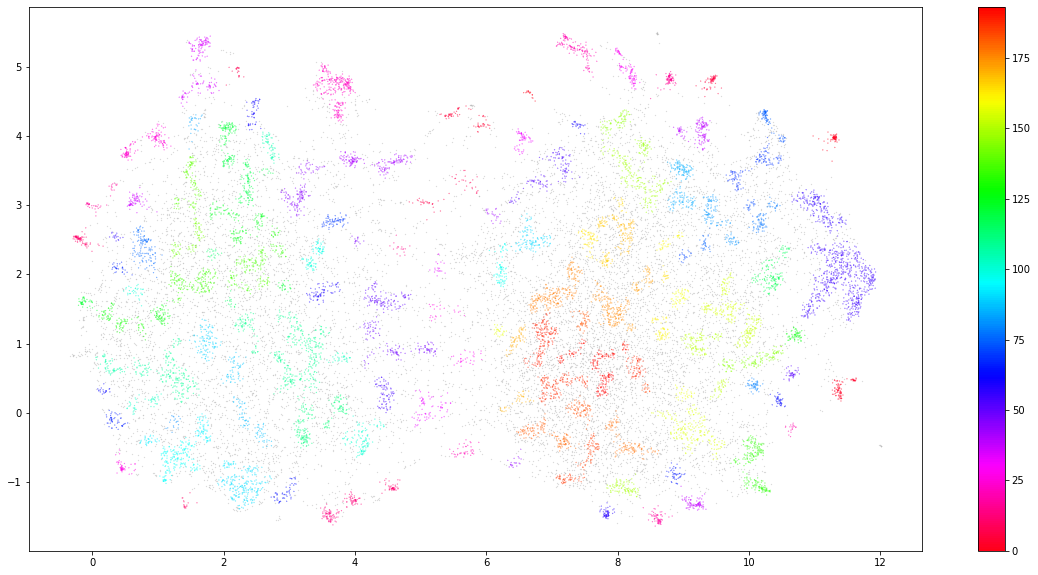

In [38]:
import matplotlib.pyplot as plt

# Prepare data
#umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_embeddings, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [26]:
result.head()

,x,y,labels
0,2.063884,6.426547,7
1,6.566568,12.086987,46
2,0.869241,8.402539,-1
3,8.773838,7.879388,158
4,10.580029,8.894028,108


In [40]:
result.labels.value_counts()

-1      8960
 190    1688
 95      764
 105     392
 137     251
        ... 
 107      16
 67       16
 115      16
 63       15
 185      15
Name: labels, Length: 192, dtype: int64

In [34]:
df_result=pd.concat([df,result],axis=1)

#### Notes

Merging the original data with the dataframe that is producing the above graph to examine different elements.

<br>First it appears there are two large circles left and right. Below it seems that the left are desserts for the most part and the right are savory.



In [45]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)

In [38]:
df_result[df_result['x']<4]['clean_ingredients']

0        jar marshmallow creme pkg cream cheese philade...
2         loaf bread dough  brown sugar pkg regular van...
6        lg potato stick butter dash allspice  nutmeg  ...
7         sugar  white vinegar stick cinnamon whole clo...
9            peanut skin  white almond bark chocolate chip
                               ...                        
22300    tbsp cocoa  sugar stick butter margarine  crea...
22301    apple  brown sugar  water  lemon juice  ground...
22302     flour  splenda sugar substitute  apricot sulf...
22305     purpose flour  soda  salt  shortening butter ...
22309     sugar  raw peanut  karo syrup  oleo  vanilla ...
Name: clean_ingredients, Length: 8820, dtype: object

In [39]:
df_result[df_result['x']>6]['clean_ingredients']

1         russet yukon gold potato inch cube  low fat m...
3         cream half half large egg  pepper  salt  pork...
4         lean ground beef small onion bean l bean    t...
8         red kidney bean  salt tbsp peanut canola oil ...
10        fingerling potato inch piece  parsley  chive ...
                               ...                        
22304     plus tbsp sugar  dry mustard  salt  celery sa...
22306    rice paper bowl warm water sprout carrot napa ...
22307     ground beef medium onion egg piece bread brea...
22308     dry elbow macaroni  italian breadcrumb  frenc...
22310    large eggplant   salt  extra virgin olive oil ...
Name: clean_ingredients, Length: 11790, dtype: object

In [48]:
df_result[df_result['labels']==-1]['clean_ingredients'].sample(n=20,random_state=422)

11186                                                                                                                                                                                                                             large box cavatappi  mozzarella  parmesan cheese  raw cow white cheddar  soft goat cheese  milk  half half tbsp large onion clove garlic  pancetta ask thick slice deli  dijon mustard mine shallot dijon  fresh thyme leaf  red pepper flake  flour  nutmeg medium butternut squash longways seed  panko breadcrumb  unsalted butter tbsp  olive oil salt black pepper  pasta water
11665                                                                                                                                                                                                                                                                                                                                                                                                            

In [49]:
df_result[df_result['labels']==190]['clean_ingredients'].sample(n=20,random_state=422)

8328                                                                                                                                                                                                                                        beef broth  bourbon  brown sugar  white wine vinegar thick cut pork chop ground allspice  butter  fresh mint
18963                                                                                                                                             butter  olive oil medium zucchini   garlic minced  medium dry white wine  salmon fillet skin flesh cubed  fresh basil leaf plus garnish  salt  ground black pepper  pappardelle chopped walnut garnish
881                                                                                                                                                                                                                                                                             almond  extra olive oil  chili powder 

#### Hierarchical Topic Reduction


In [39]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=11)

#### Notes:

Started examining different areas of the graph above. Seems like it might be desserts on left and savory on right for the most part. 

Next steps - start examining if the distance between items and the topics they represent makes sense.
<br>Review those marked as outliers
<br>Review the largest topics

<br>Test out inputing a list and returning recipe ideas.

In [40]:
model.topic_words_reduced

array([['mushroom soup', 'cheddar cheese', 'broccoli cauliflower',
        'broccoli rabe', 'broccoli spear', 'broccoli floret',
        'italian dressing', 'frozen hash', 'broccoli floweret',
        'bread crumb', 'stalk celery', 'jar pimento',
        'cauliflower floret', 'hellmann mayonnaise',
        'vinaigrette dressing', 'cracker crumb', 'island dressing',
        'ranch dressing', 'salad dressing', 'stuffing mix',
        'dressing family', 'cauliflower broken', 'catalina dressing',
        'loaf bread', 'ranch salad', 'head cauliflower',
        'cornbread stuffing', 'soup', 'sourdough bread',
        'button mushroom', 'frozen broccoli', 'dijon mustard',
        'pimento stuffed', 'miracle whip', 'buttered bread',
        'bread machine', 'jar pimiento', 'pita bread', 'jar marinated',
        'jar ragu', 'sour cream', 'cremini mushroom',
        'portabella mushroom', 'mushroom cap', 'hash brown',
        'porcini mushroom', 'jar picante', 'portobello mushroom',
        'sh

In [32]:
model.topic_word_scores_reduced

array([[0.65400016, 0.64357245, 0.6430511 , 0.6365627 , 0.6319772 ,
        0.6234589 , 0.6187035 , 0.60998607, 0.60513914, 0.6009153 ,
        0.59123456, 0.5880622 , 0.5879829 , 0.58453125, 0.5803009 ,
        0.5759488 , 0.5724046 , 0.5707104 , 0.57053626, 0.5669534 ,
        0.56360245, 0.5560304 , 0.5407639 , 0.5402621 , 0.53686666,
        0.53441435, 0.5301211 , 0.528527  , 0.5283885 , 0.5283325 ,
        0.5276388 , 0.52655494, 0.5262363 , 0.5246583 , 0.5198008 ,
        0.5164312 , 0.51568556, 0.5119367 , 0.5099522 , 0.5088962 ,
        0.50868446, 0.5084374 , 0.5082421 , 0.50546   , 0.5048989 ,
        0.5045969 , 0.50425464, 0.50265276, 0.50185317, 0.49710223],
       [0.67489636, 0.67483884, 0.6676464 , 0.6579025 , 0.63212335,
        0.6186508 , 0.6145774 , 0.6054386 , 0.5999694 , 0.5994658 ,
        0.5931964 , 0.5808962 , 0.57244825, 0.56785405, 0.5652404 ,
        0.5632892 , 0.5574627 , 0.5546657 , 0.5534041 , 0.54937124,
        0.5478761 , 0.54355717, 0.5376996 , 0.5

In [ ]:
vectors = model.document_vectors

umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=2, 
                            metric='cosine').fit_transform(model.document_vectors)

cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

import matplotlib.pyplot as plt

# Prepare data
#umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_embeddings, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [57]:
model.query_topics(query="tofu",reduced=True,num_topics=4)

([array(['soy', 'sesame', 'hoisin', 'mirin', 'chinese', 'root', 'scallions',
         'thai', 'tamari', 'sprouts', 'fish', 'garlic', 'cilantro',
         'gingerroot', 'red', 'asian', 'scallion', 'oyster', 'snow',
         'diagonally', 'piece', 'ginger', 'tofu', 'sherry', 'bean',
         'minced', 'sliced', 'oil', 'shallots', 'cabbage', 'julienne',
         'carrot', 'snow peas', 'trimmed', 'long', 'onions', 'thinly',
         'curry', 'spring', 'thin', 'thighs', 'wedges', 'tamari soy',
         'sodium', 'coriander', 'seeds', 'crosswise', 'and', 'clove',
         'cleaned'], dtype='<U22'),
  array(['you', 'it', 'is', 'will', 'like', 'are', 'this', 'too', 'have',
         'some', 'but', 'use', 'any', 'be', 'have it', 'also', 'you have',
         'want', 'ingredients', 'it is', 'not too', 'used', 'out',
         'depending', 'if', 'you want', 'make', 'an', 'work too',
         'works too', 'it not', 'on', 'other', 'your', 'also be', 'do',
         'just', 'this is', 'have used', 'you 

In [41]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["tofu"\
        ], num_topics=5)

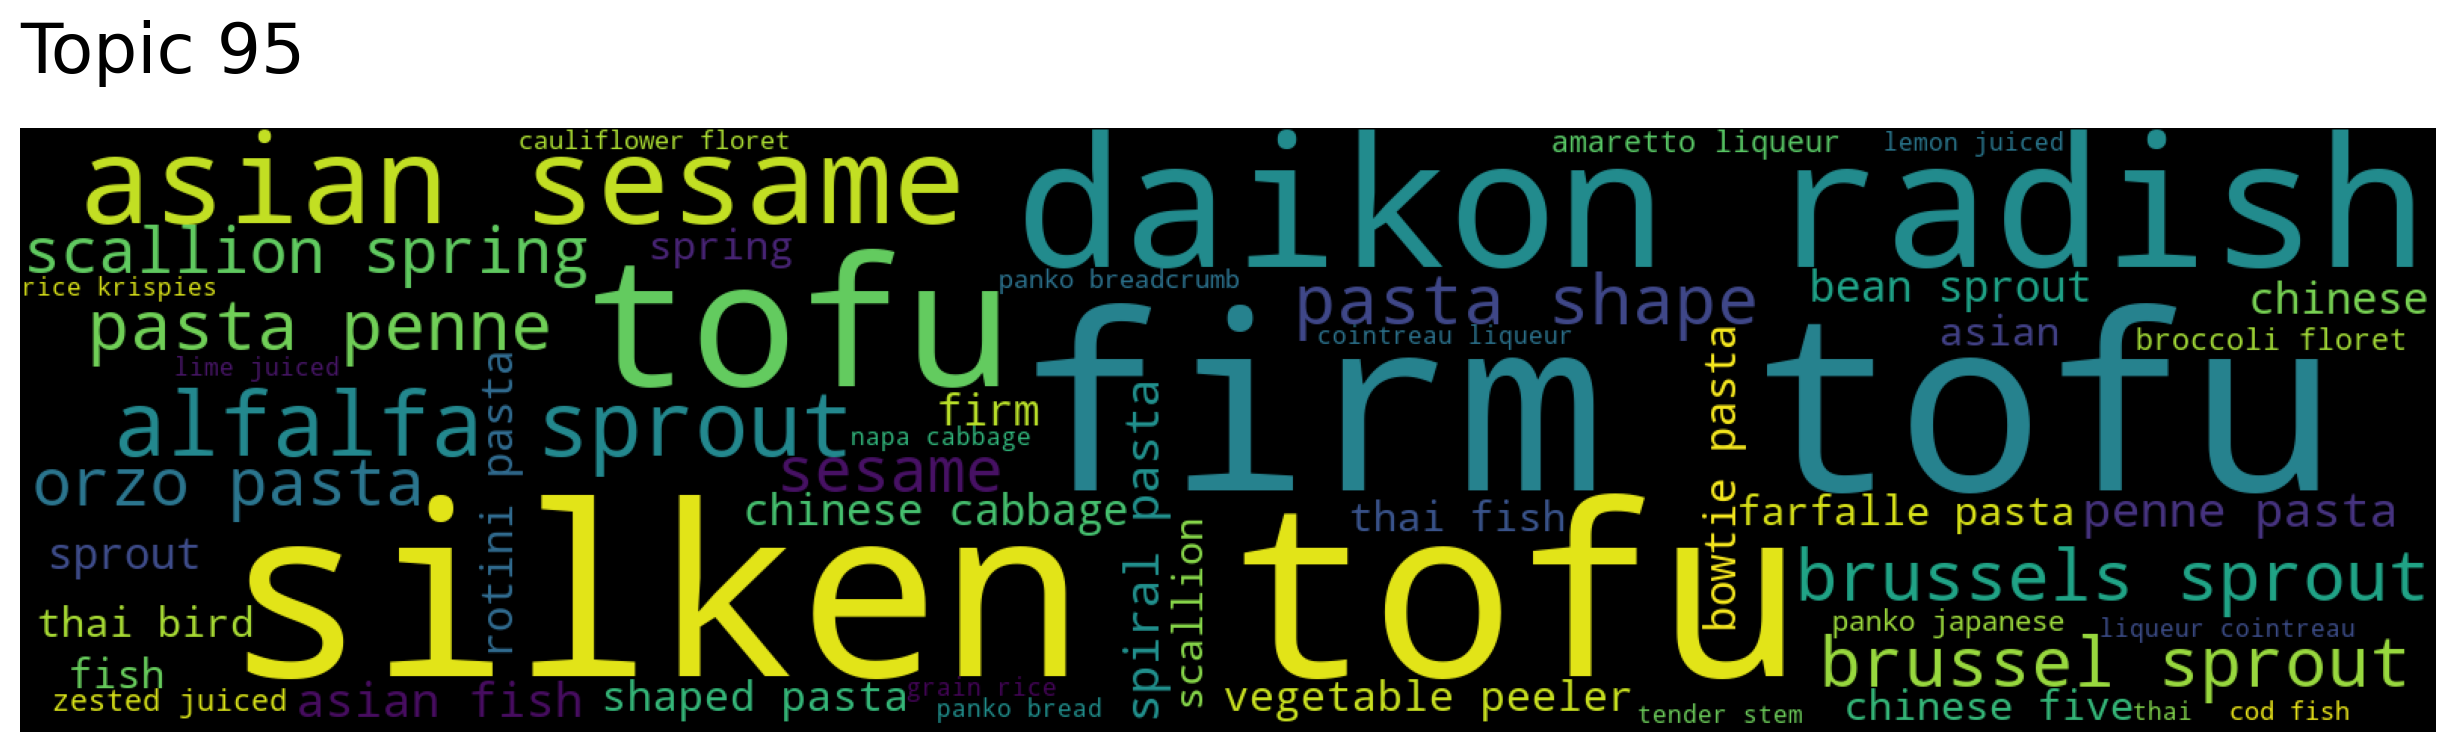

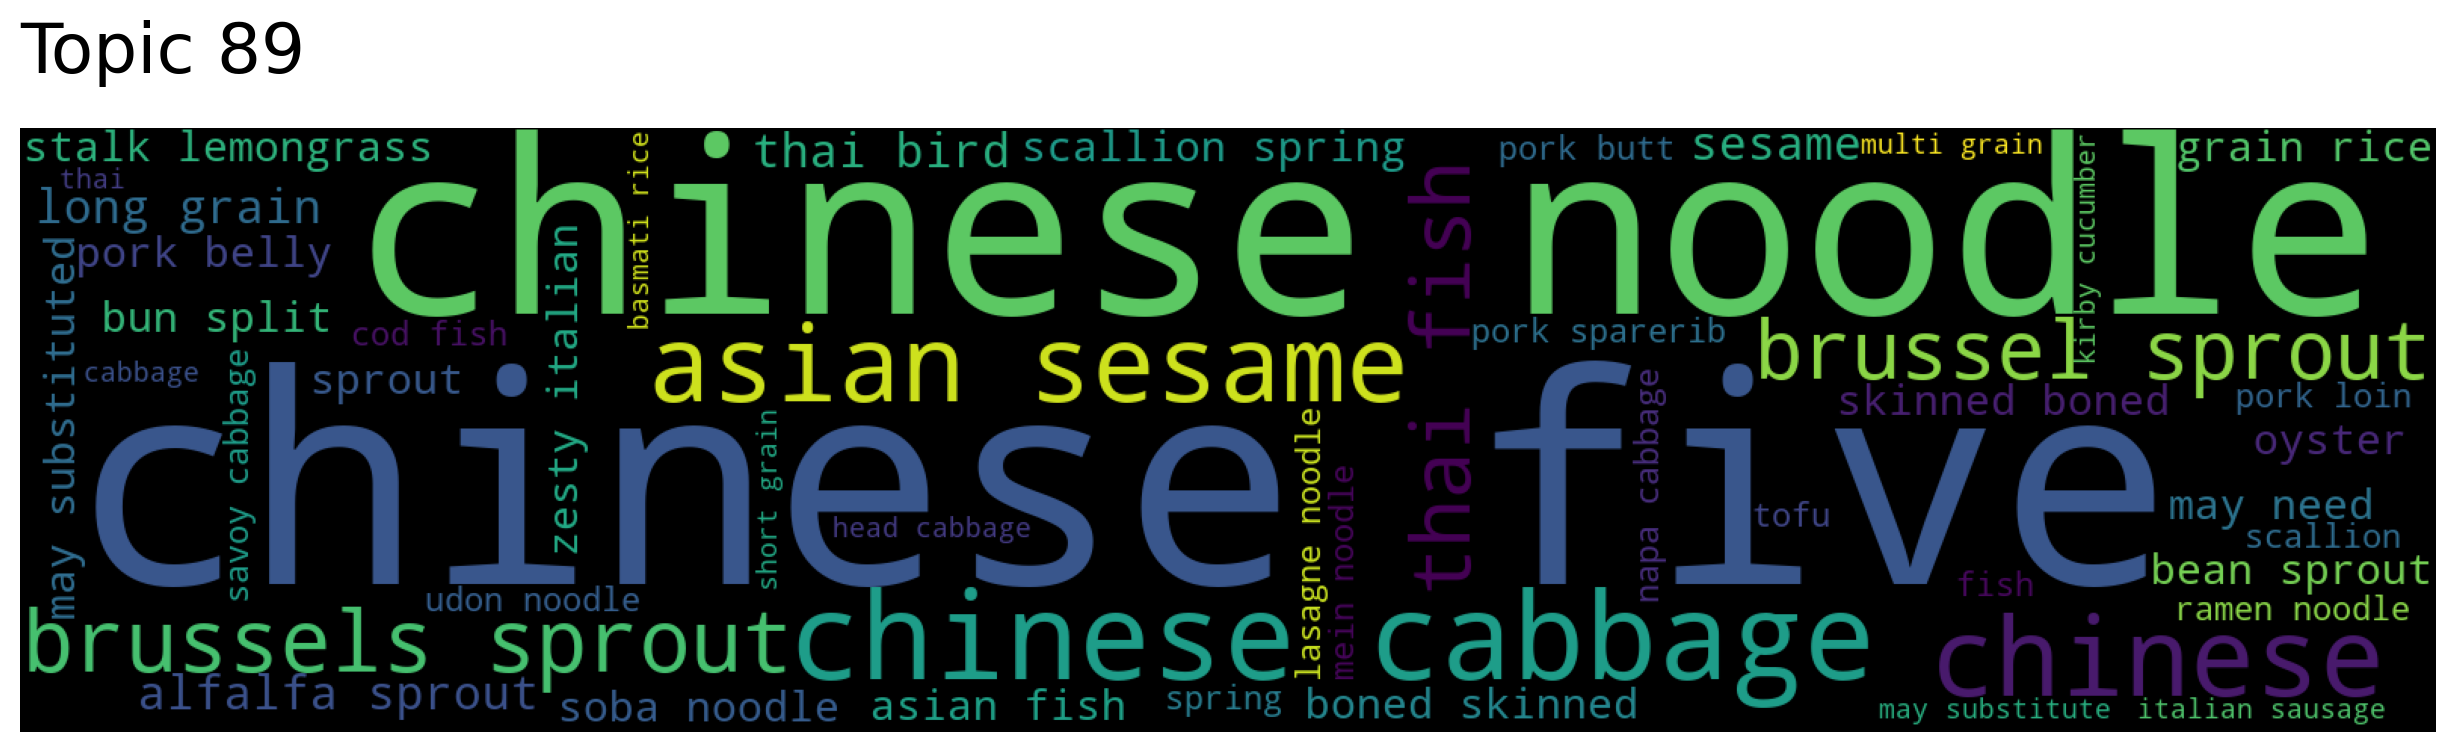

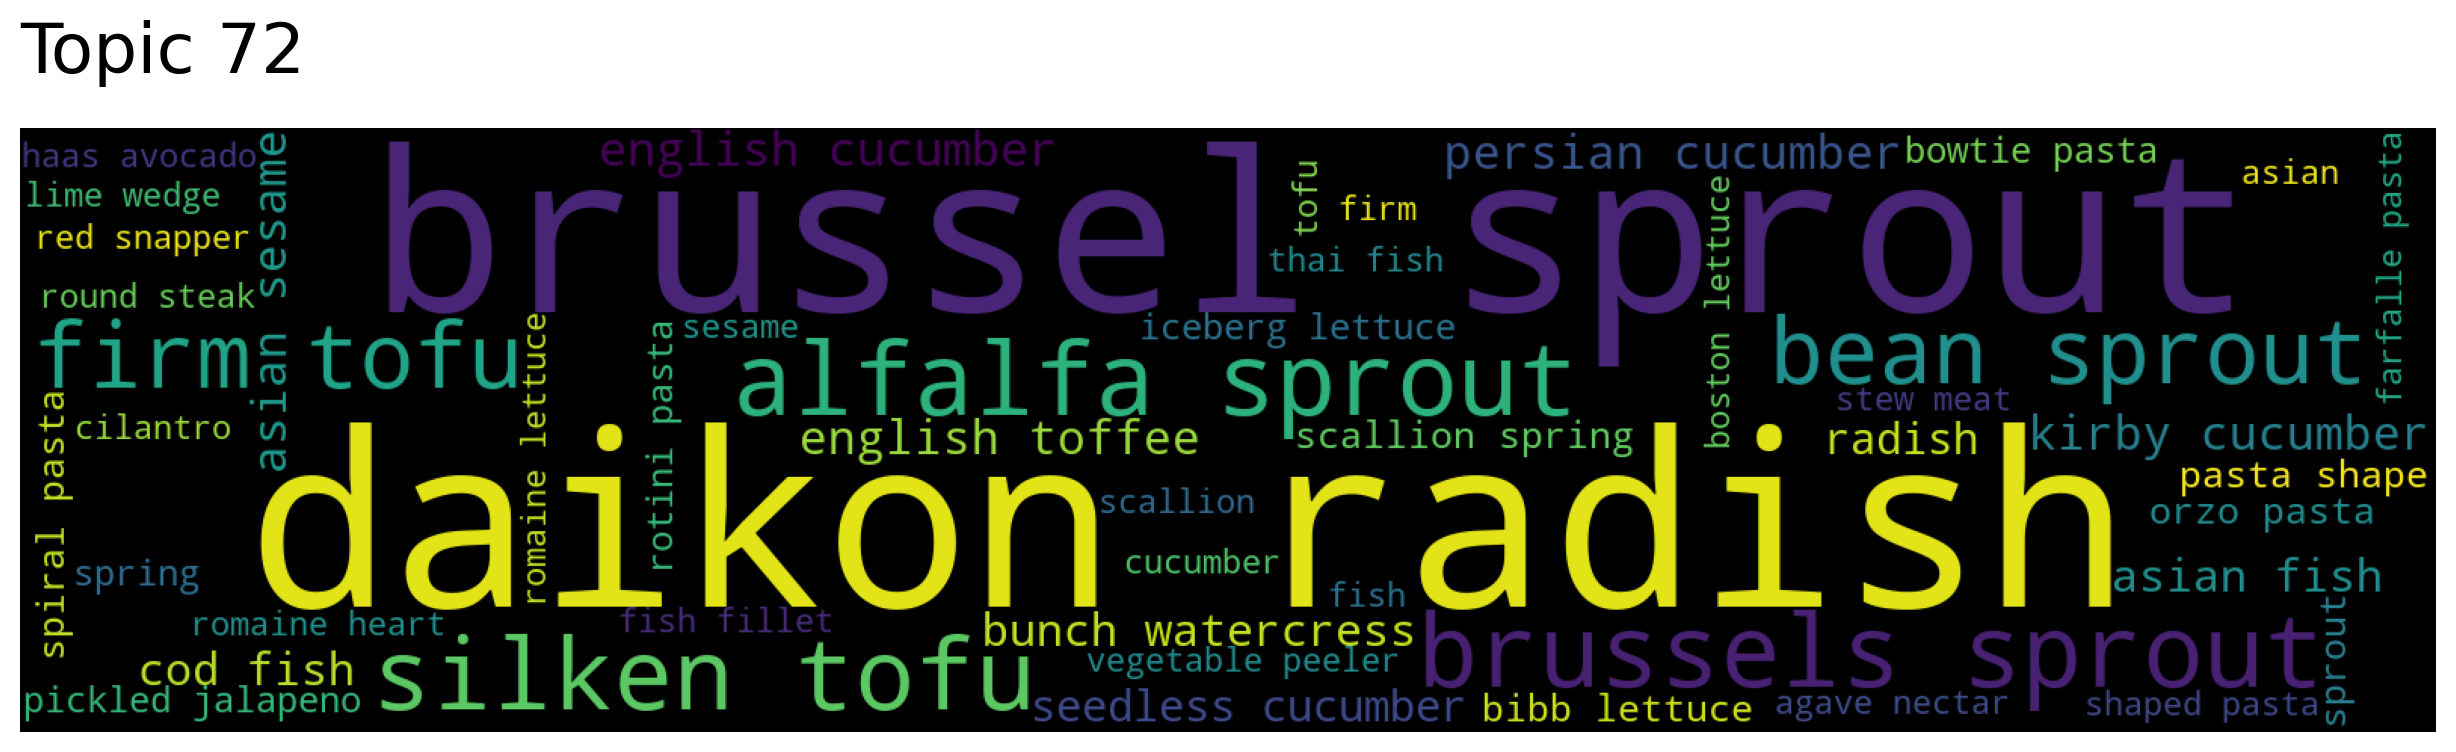

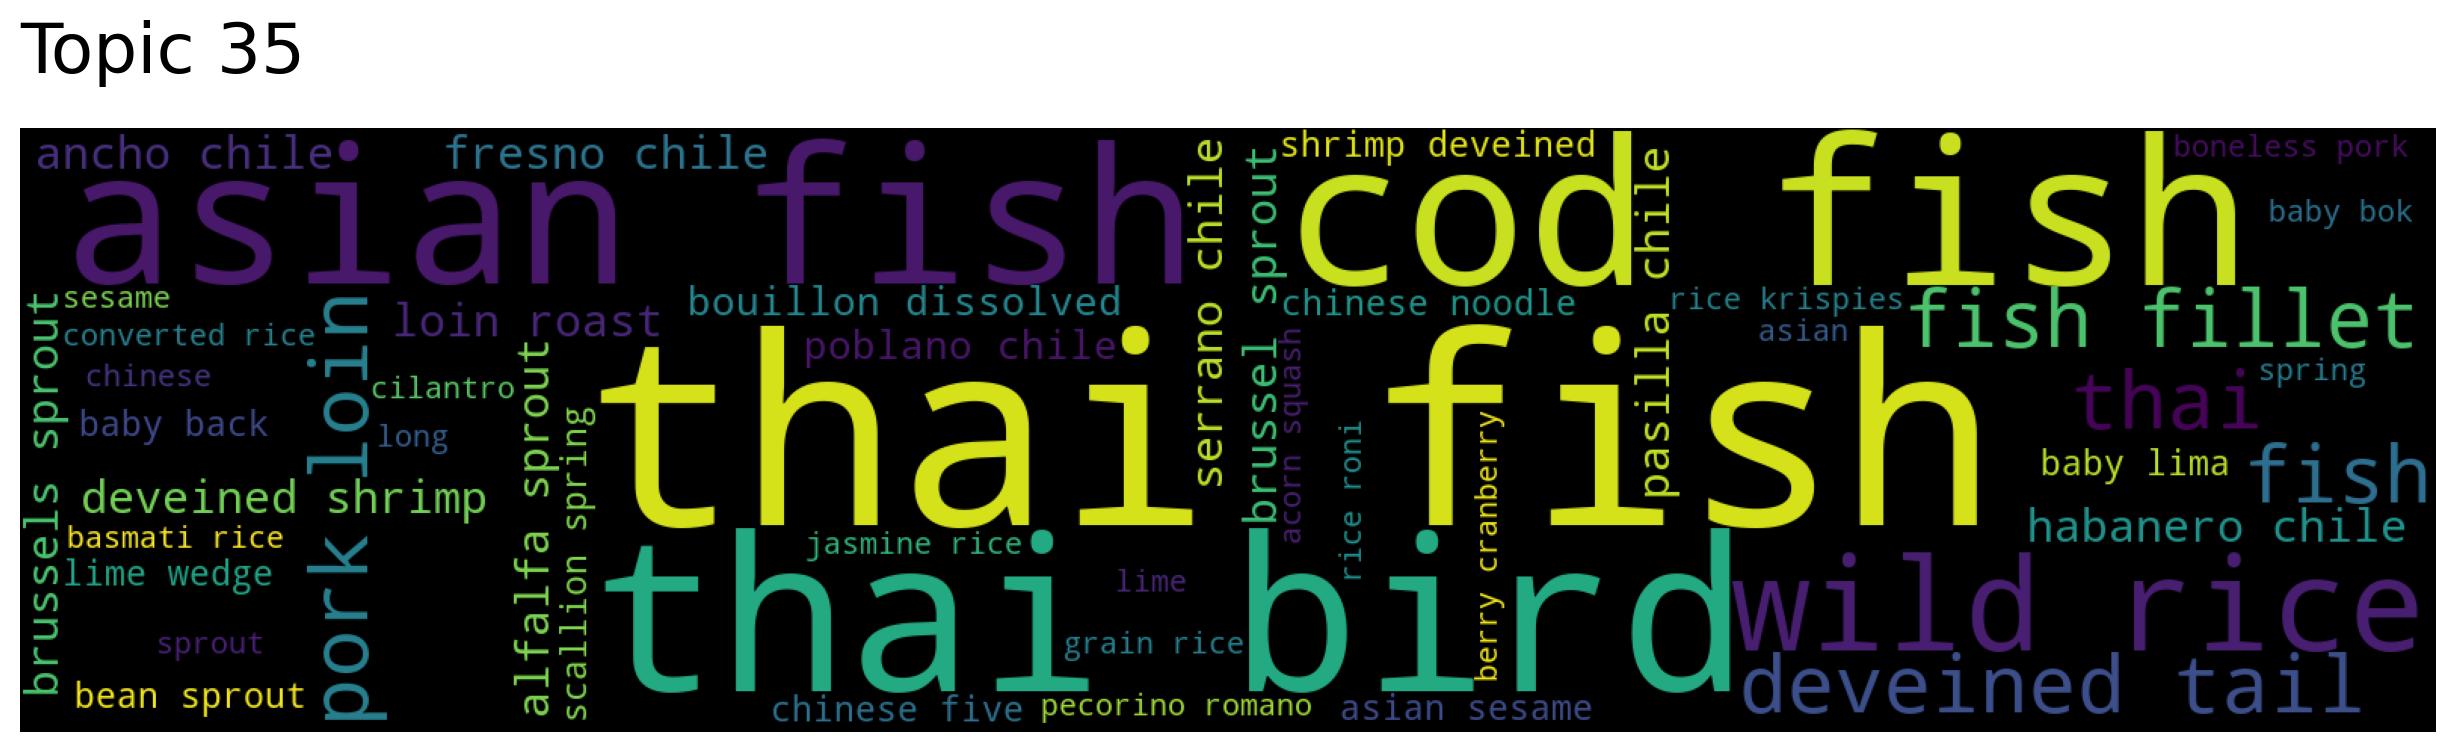

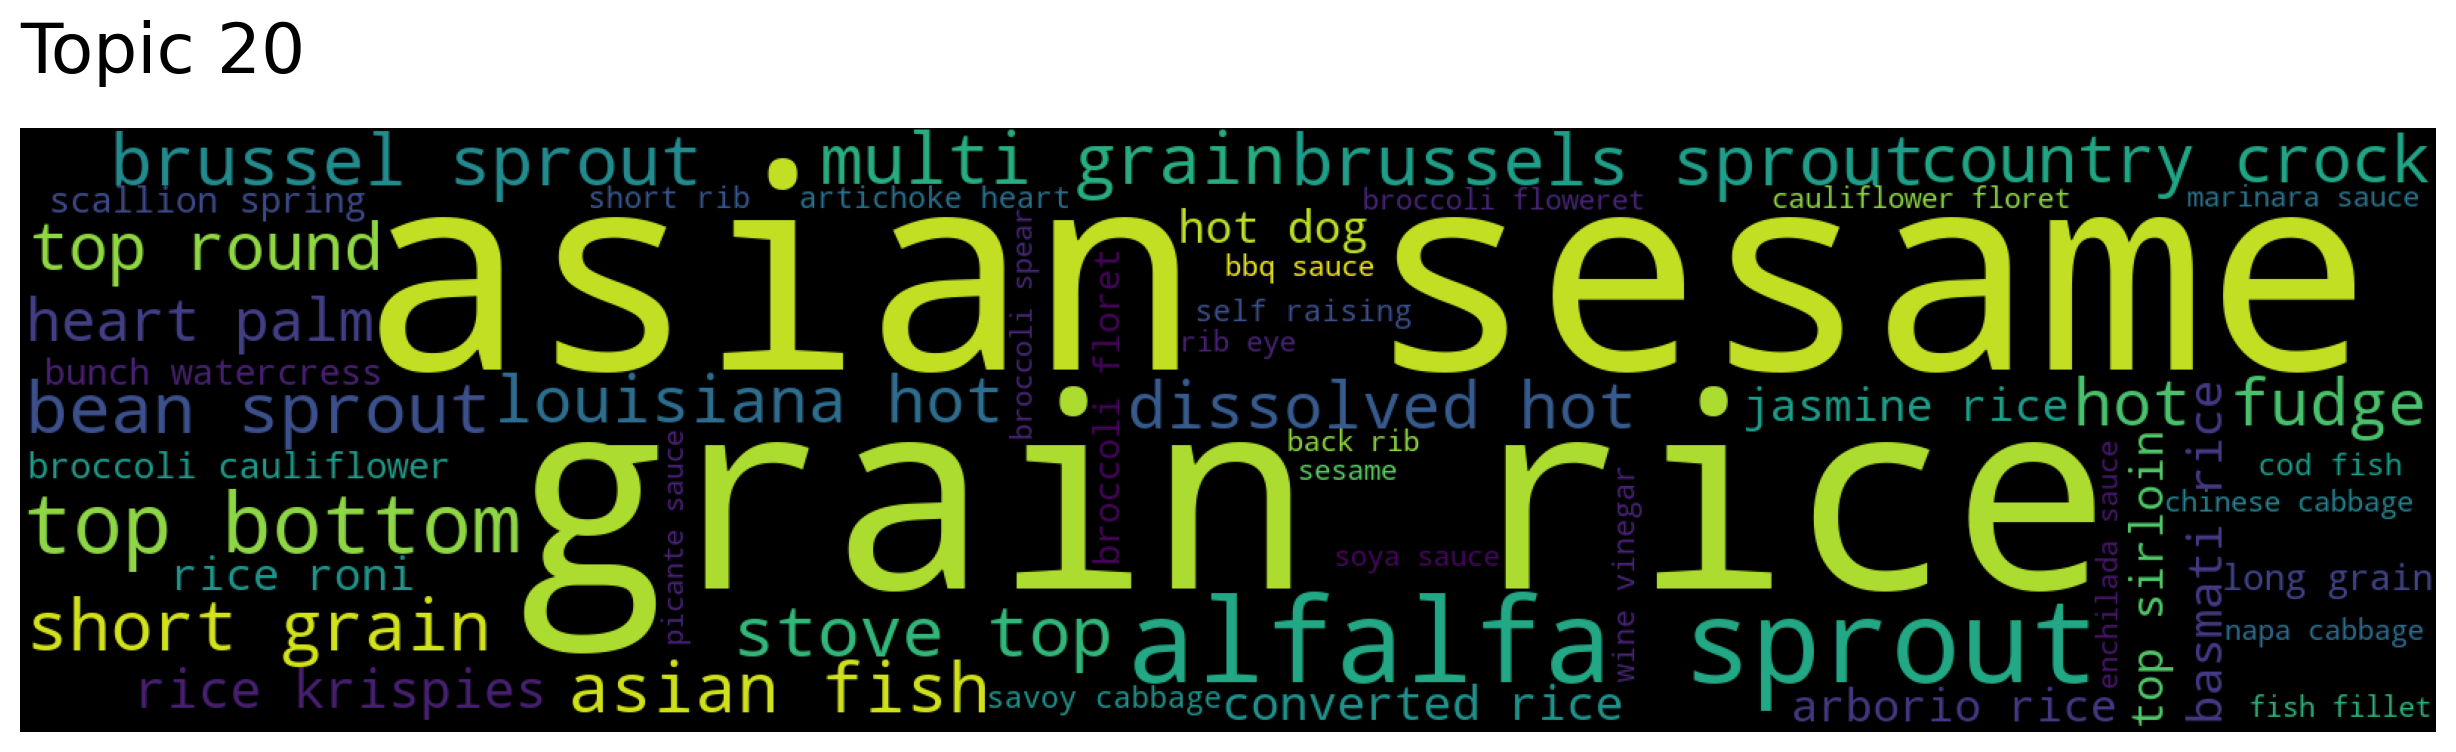

In [42]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [43]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=95, num_docs=5)

In [44]:
documents

array(['       chicken broth   sauce  rice vinegar   sesame oil  mushroom   firm tofu       bok choy    green onion',
       '   firm tofu      sauce  lime juice  rice vinegar  dark sesame oil  sugar   fresh      hot chili sauce sriracha  rice noodle carrot   red bell     scallion       chestnut     snow pea  sesame ',
       ' cauliflower rice green onion  green included        red    shitake mushroom    sauce  sriracha  sesame oil  cilantro   firm tofu   vegetable oil',
       ' block silken tofu   sauce   chili oil   sesame oil    zha cai    scallion cilantro ',
       'block firm tofu bunch spinach carrot   sesame   sugar  usukuchi  sauce'],
      dtype=object)

In [46]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=\
                ['pasta', 'olive oil', 'cheese', 'tomato', 'mushroom', 'milk'], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    doc_title = df['title'][doc_id]
    print(f"Document: {doc_id}, Score: {score}, Title: {doc_title}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 13222, Score: 0.44850996136665344, Title: Red Wine Vinaigrette
-----------
 short pasta  penne ziti elbow  shell   alfredo sauce   bought  pesto sauce   bought  sun  tomato   grilled chicken  strip pre packaged   vegetable  mushroom zucchini broccoli floret  cauliflower floret    mozzarella cheese gouda cheddar  havarti cheese 
-----------

Document: 12900, Score: 0.3907349407672882, Title: Crawfish Or Shrimp And Crab Meat Fettucine
-----------
 penne pasta   olive oil  zucchini end    ribbon  cherry tomato   kalamata black olive  ham thickly   wide strip  baby arugula   goat cheese crumbled
-----------

Document: 934, Score: 0.3866236209869385, Title: Rachael Ray'S Tuna Melt Sammie
-----------
   quality tuna     artichoke heart    sun  tomato    black olive   caper   flat  parsley    shallot  red onion    baby arugula  lemon olive oil liberal    deli  provolone cheese loaf ciabatta split  horizontally
-----------

Document: 10416, Score: 0.3826445937156677, Title: Asparagus